01

In [1]:
# К алгоритму kNN, реализованному на уроке, реализуйте добавление весов соседей по любому из 
# показанных на уроке принципов.

In [2]:
import numpy as np

from sklearn import model_selection
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

In [3]:
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += (x1[i] - x2[i]) ** 2
    
    return distance ** .5

In [4]:
def accuracy(y_pred, y):
    return (sum(y_pred == y) / len(y))

In [5]:
def get_graph(x_train, y_train, k):
    
    cmap_light = ListedColormap(['aquamarine', 'wheat', 'plum'])

    h = .02

    x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
    y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    z = knn(x_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)

    z = np.array(z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, z, cmap=cmap_light)

    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f'Трехклассовая kNN классификация при k = {k}')
    plt.show()

In [6]:
def kmeans(data, k, max_iterations, min_distance):
    
    classes = {i: [] for i in range(k)}
    
    centroids = [data[i] for i in range(k)]
    
    for _ in range(max_iterations):
        for x in data:
            distances = [e_metrics(x, centroid) for centroid in centroids]
            classification = distances.index(min(distances))
            classes[classification].append(x)
            
        old = centroids.copy()
        
        for classification in classes:
            centroids[classification] = np.average(classes[classification], axis=0)
            
        optimal = True
        for centroid in range(len(centroids)):
            if np.sum(np.abs((centroids[centroid] - old[centroid]) / old * 100)) > min_distance:
                optimal = False
        
        if optimal:
            break
            
    return old, classes

In [7]:
def knn(x_train, y_train, x_test, k, weights='uniform'):
    
    w_list = []
    for x in x_test:
        test_distances = []
        
        for i in range(len(x_train)):
            distance = e_metrics(x, x_train[i])
            
            if weights:
                w = 1 / (i + 1)
            else:
                w = 1
        
            test_distances.append((distance * w, y_train[i]))
        
        classes = {class_item: 0 for class_item in set(y_train)}
        
        w = 1
        for i, d in enumerate(sorted(test_distances)[:k], start=1):
            if weights == 'number':
                w = 1 / i
            elif weights == 'distance':
                w = 1 / (d[0] + 1) ** 2
            classes[d[1]] += w
            
        w_list.append(sorted(classes, key=classes.get)[-1])
        
    return w_list

In [8]:
X, Y = load_iris(return_X_y=True)
X = X[:, :2]

In [9]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=.2, 
                                                                    random_state=42)

In [10]:
cmap = ListedColormap(['darkgreen', 'orange', 'purple'])

In [11]:
k_n_n = [i for i in range(1, 11)]
for k in k_n_n: 
    Y_pred = knn(X_train, Y_train, X_test, k, weights='distance')
    print(f'Точность knn при k = {k}: {round(accuracy(Y_pred, Y_test), 3)}')

Точность knn при k = 1: 0.7
Точность knn при k = 2: 0.7
Точность knn при k = 3: 0.767
Точность knn при k = 4: 0.767
Точность knn при k = 5: 0.867
Точность knn при k = 6: 0.767
Точность knn при k = 7: 0.867
Точность knn при k = 8: 0.867
Точность knn при k = 9: 0.867
Точность knn при k = 10: 0.867


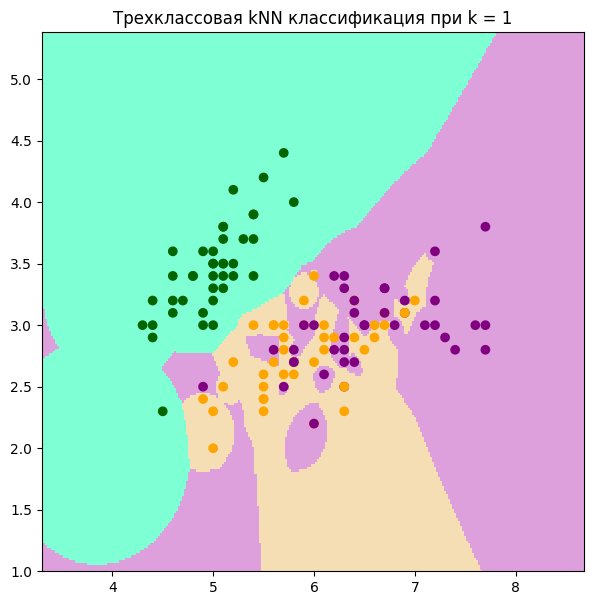

In [12]:
get_graph(X_train, Y_train, 1)

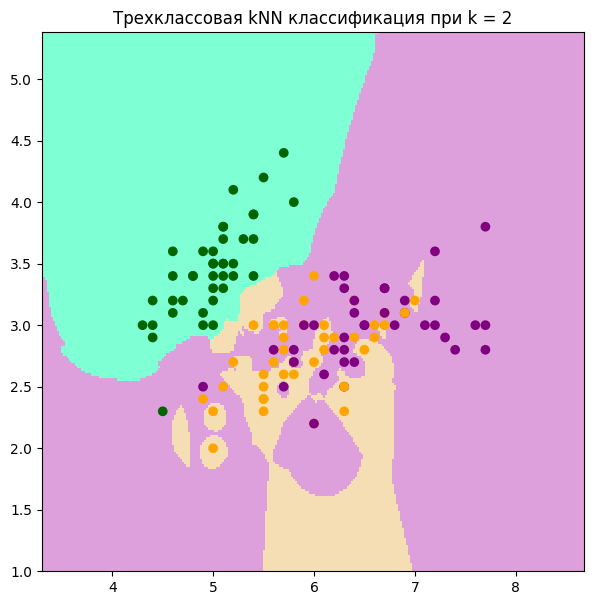

In [13]:
get_graph(X_train, Y_train, 2)

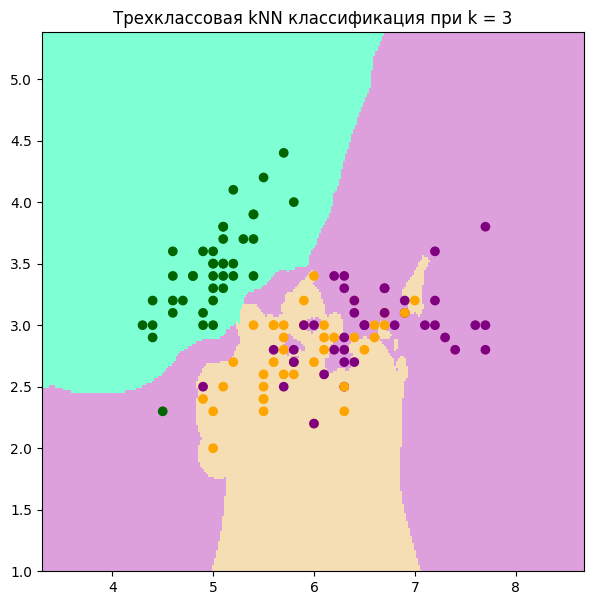

In [14]:
get_graph(X_train, Y_train, 3)

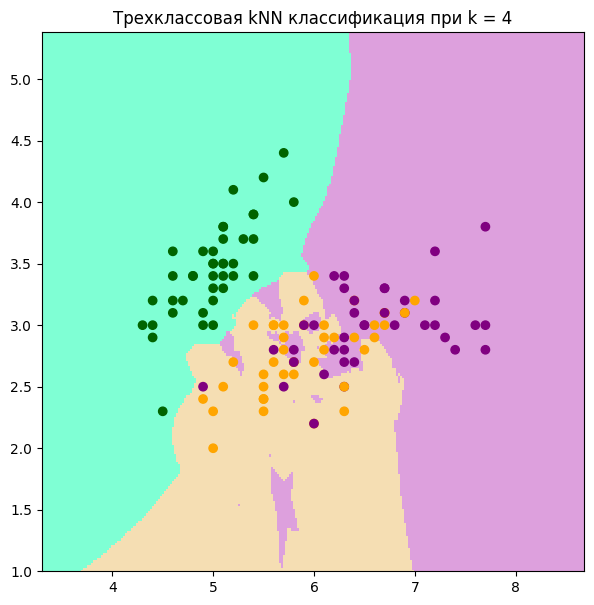

In [15]:
get_graph(X_train, Y_train, 4)

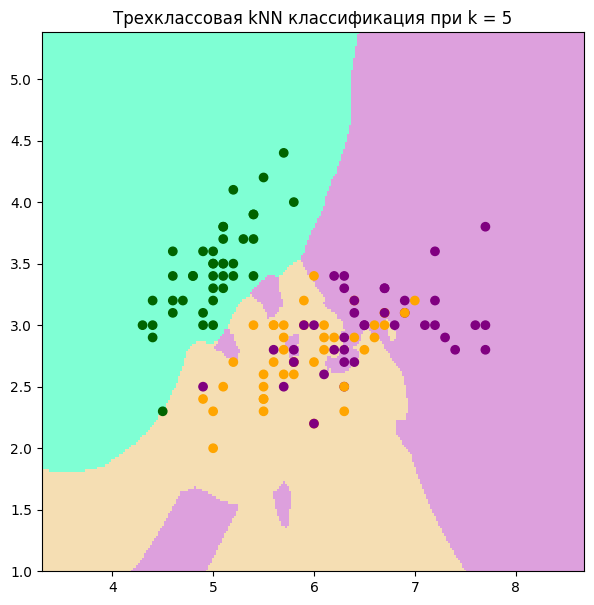

In [16]:
get_graph(X_train, Y_train, 5)

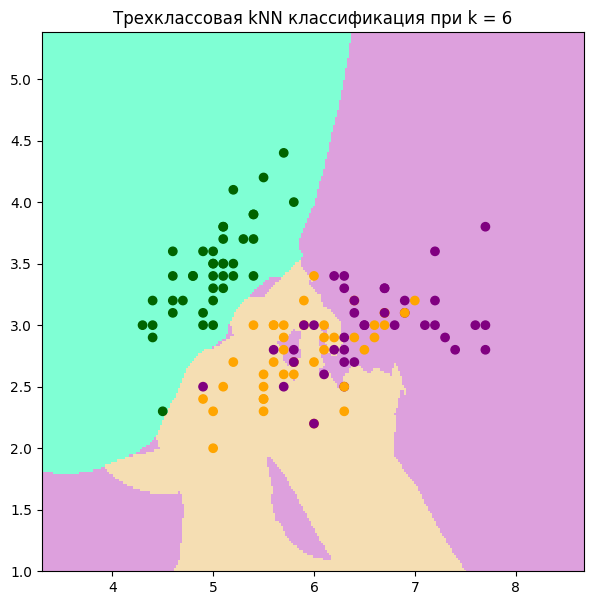

In [17]:
get_graph(X_train, Y_train, 6)

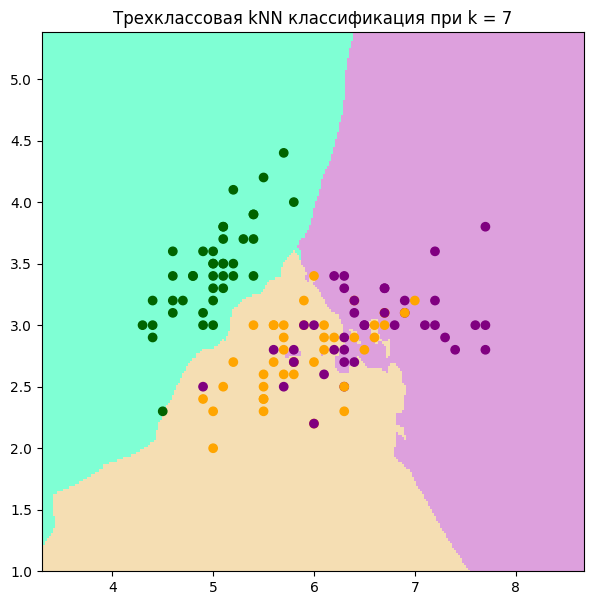

In [18]:
get_graph(X_train, Y_train, 7)

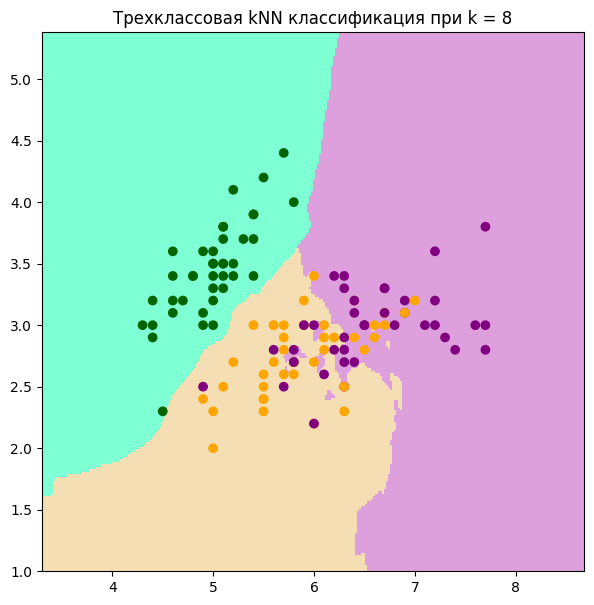

In [19]:
get_graph(X_train, Y_train, 8)

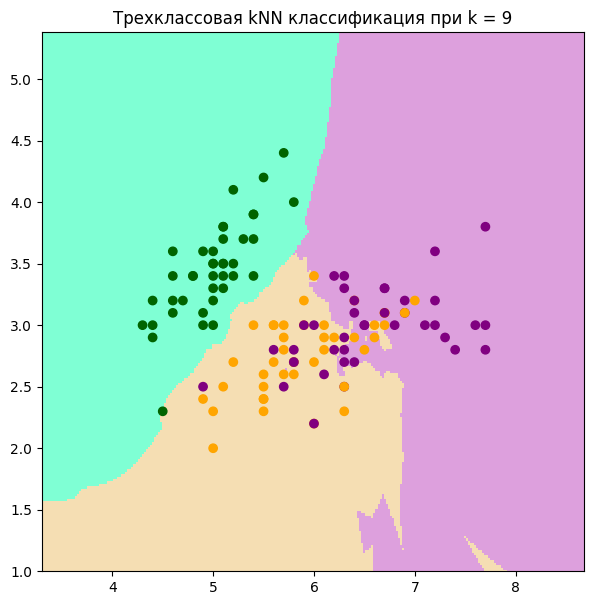

In [20]:
get_graph(X_train, Y_train, 9)

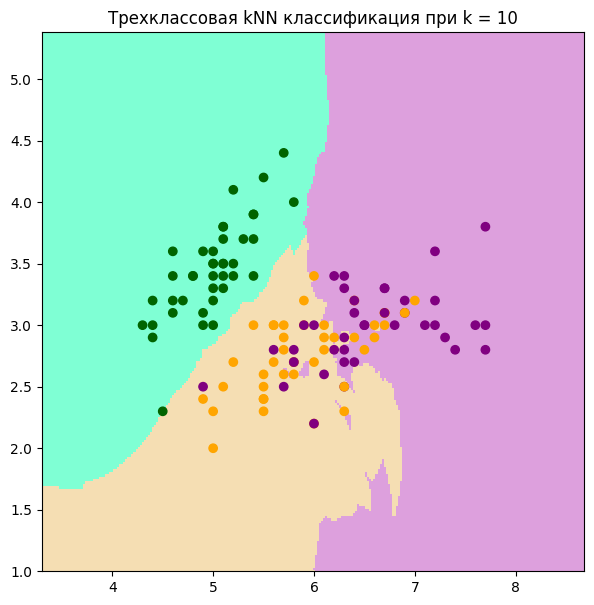

In [21]:
get_graph(X_train, Y_train, 10)

02

In [22]:
# Напишите функцию по подсчёту метрики качества кластеризации как среднее квадратичное 
# внутрикластерное расстояние и постройте график её зависимости от k (взять от 1 до 10) для 
# выборки данных из этого урока.

In [23]:
def within_cluster_sum_of_squares(centroids, clusters):
    
    wcss = 0

    for i, u in enumerate(centroids):
        wcss += np.sum(np.sum((clusters[i] - u) ** 2, axis=1)) / (2 * len(clusters[i]))
        
    return wcss

Text(0, 0.5, 'wcss')

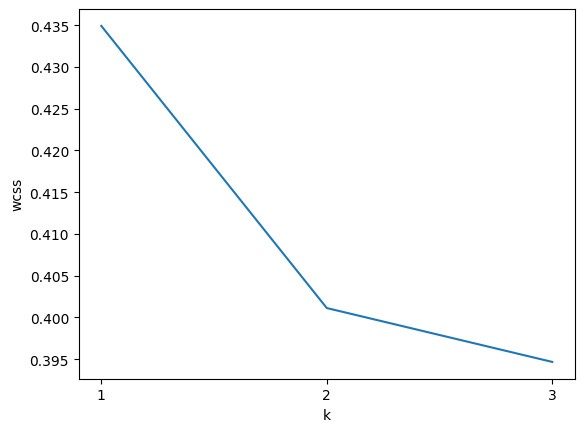

In [24]:
max_iterations = 50
min_distance = 1e-4

k_list = []
wcss_list = []

for k in range(1, 4):
    centroids, clusters = kmeans(X, k, max_iterations, min_distance)
    wcss = within_cluster_sum_of_squares(centroids, clusters)
    k_list.append(k)
    wcss_list.append(wcss)

plt.plot(k_list, wcss_list)
plt.xticks(k_list)
plt.xlabel('k')
plt.ylabel('wcss')